In [6]:
install.packages("tidyverse")
# Install and load the IRdisplay package
install.packages("IRdisplay")
# Install the "titanic" package (if not already installed)
install.packages("titanic")

# Load the "titanic" package
library(titanic)

library(tibble)
library(dplyr)
library(ggplot2)

library(IRdisplay)
library(tidyverse)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpA4YILc/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpA4YILc/downloaded_packages

Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpA4YILc/downloaded_packages


In [2]:
#####################################################
# Descriptive Statistics:
# association attendance and course results
# Solution
#
# File: des_stat_attendance_result_sol.R
#
######################################################
library(tidyverse)

# 3x2-contingency table: attendance, result
tab <- matrix(c(40,10,20,10,10,10),nrow=3,ncol=2,byrow=TRUE)
tab

# indifference table
# indifference table
ind_tab <- 
  matrix(rowSums(tab),nrow=3,ncol=1)   %*% 
  matrix(colSums(tab),nrow=1,ncol=2) / sum(tab)
# or
chisq.test(tab)$expected

# computation of Chi^2, C and C_corr
chisq.test(tab)$statistic
# or
chi_2 <- sum((tab-ind_tab)^2/ind_tab)
chi_2 # 6.349206
C <- (chi_2/(chi_2+sum(tab)))^0.5
C # 0.2443389
C_korr <- ((min(2,3)/(min(2,3)-1)) *chi_2/(chi_2+sum(tab)))^0.5
C_korr # 0.3455474


40,10
20,10
10,10


35,15
21,9
14,6


X-squared 
 6.349206

[1] 6.349206

[1] 0.2443389

[1] 0.3455474

In [3]:
#####################################################
# Descriptive Statistics: Exercise 4.1, 
# Heumann, Schomaker, page 90
# Solution
#
# File: des_stat_coffee_sol.R
#
###################################################### 

# load packages
library(tidyverse)

# data
rate <-
  tibble(
    cafe = c(1,2,3,4,5),
    x = c(3,8,7,9,5),
    y = c(6,7,10,8,4)
  )
# add the ranks
rate <- 
  rate %>% 
  mutate(R_x = rank(x)) %>%
  mutate(R_y = rank(y))
# display data
rate

# Spearman's rank correlation coefficient
R <- cor(x = rate$R_x, y = rate$R_y)
R
# or directly using the cor() function
cor(x = rate$x, y = rate$y, method = "spearman")

# change the order of rating
rate <-
  rate %>%
  mutate(Rdesc_x = rank(-x)) %>%
  mutate(Rdesc_y = rank(-y))
# display 
rate

# Spearman's rank correlation coefficient
Rdesc <- cor(x = rate$Rdesc_x, y = rate$Rdesc_y)
Rdesc

# only the ratings good and bad
rate2 <- 
  tibble(
  quality = c("bad","good"),
  x = c(2,3),
  y = c(1,4)
  )
# display
rate2

# using R commands to determine rate2
tibble(
  cafe = c(1,2,3,4,5),
  x = c(3,8,7,9,5),
  y = c(6,7,10,8,4)
) %>% 
  gather(x,y, key = "journalist", value = "rating") %>%
  mutate(
    rating = if_else(rating > 5, "good", "bad")
  ) %>%
  select(-cafe) %>% 
  table() %>% 
  addmargins() -> rate2
rate2
  
# Conditional distributions
# 2:5 = proportion of bad ratings by journalist X
# 2:3 = proportion of journalist X ratings in the set of bad ratings
# relative risk: ratio of conditional distributions
# (2:5) : (1:5) = 2 = proportion of bad ratings is 2 times higher among ratings
#                     by journalist X when compared with ratings by journalist Y
# (2:3) : (3:7) = 1.55 = proportion of ratings by journalist X is 1.55 times 
#                        higher among bad ratings when compared with good ratings
# odds ratio
OR <- ((2/5)/(3/5))/((1/5)/(4/5))
OR
# (2:1) : (3:4) = 2.66 = chance of bad ratings is 2.66 times higher for ratings
#                        by journalist X when compared with good ratings
# (2:3) : (1:4) = 2.66 = chance of ratings by journalist X is 2.66 times higher 
#                        for bad ratings when compared with bad ratings by journalist Y



cafe,x,y,R_x,R_y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,6,1,2
2,8,7,4,3
3,7,10,3,5
4,9,8,5,4
5,5,4,2,1


[1] 0.6

[1] 0.6

cafe,x,y,R_x,R_y,Rdesc_x,Rdesc_y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,6,1,2,5,4
2,8,7,4,3,2,3
3,7,10,3,5,3,1
4,9,8,5,4,1,2
5,5,4,2,1,4,5


[1] 0.6

quality,x,y
<chr>,<dbl>,<dbl>
bad,2,1
good,3,4


,bad,good,Sum
x,2,3,5
y,1,4,5
Sum,3,7,10


[1] 2.666667

[1] 2.5

[1] 0.8703883


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
        1.4          1.0  



Call:
lm(formula = x ~ y)

Coefficients:
(Intercept)            y  
   -0.09091      0.75758  


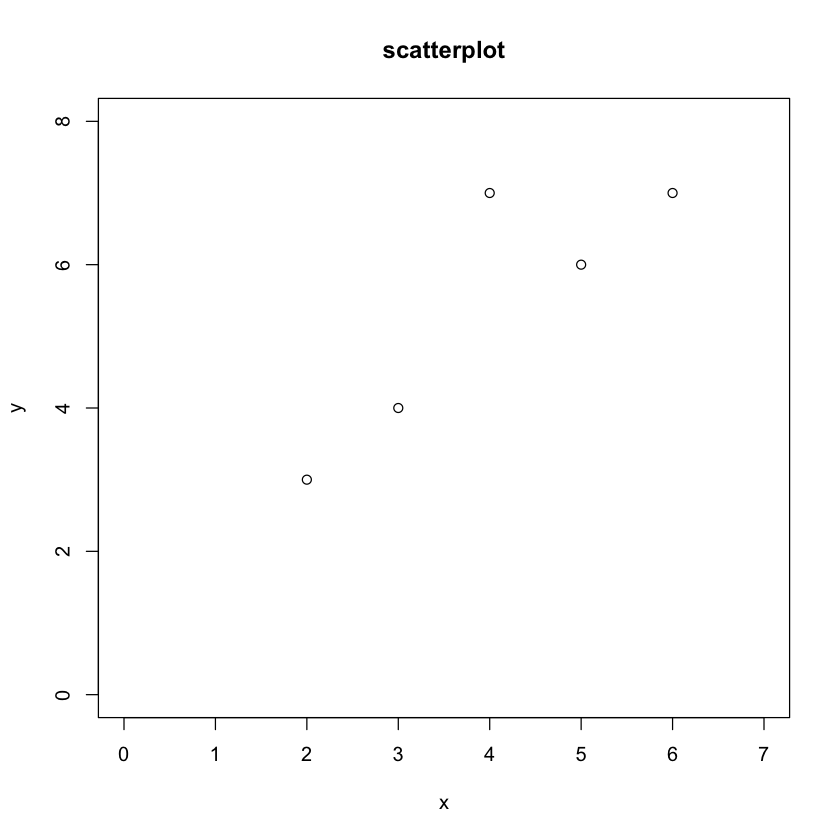

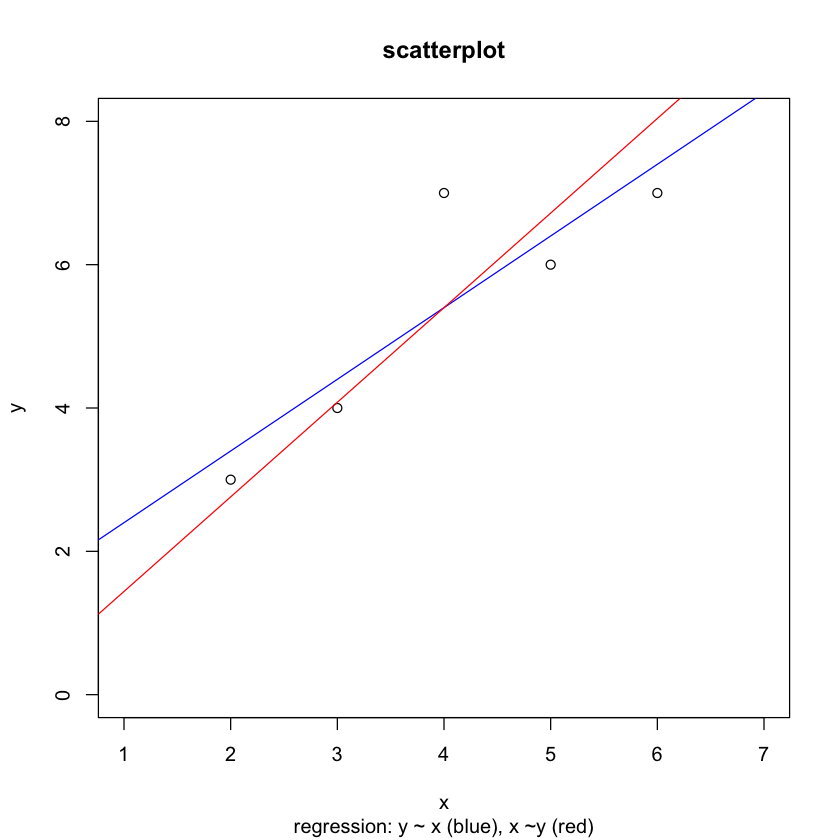

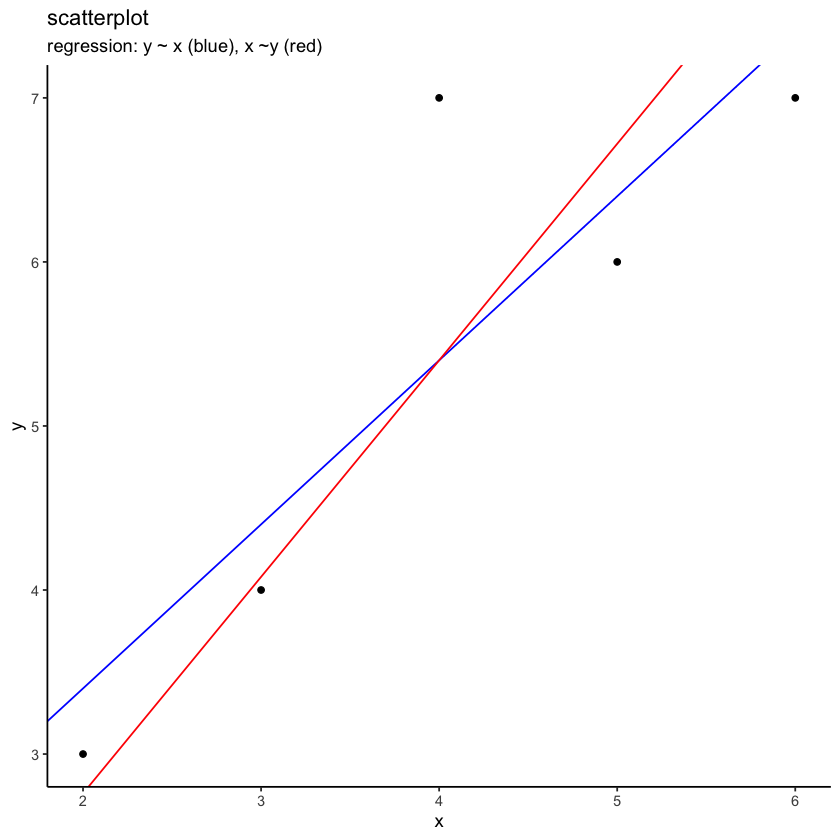

In [7]:
#####################################################
# Descriptive Statistics: Simple example linear regr.
# Complete Solution
#
# File: des_stat_ex_lin_reg_sol.R
#
#####################################################

# data
x <- c(2,6,3,4,5)
y <- c(3,7,4,7,6)

# scatterplot
par(mfrow=c(1,1))
plot(x,y,main="scatterplot", xlim=c(0,7), ylim = c(0,8))

# covariance
cov(x,y) # 2.5

# coefficient of correlation
cor(x,y) #  0.8703883

# regression line: y=a+bx
# criterion variable Y and predictor variable X
lm(y~x)
# a = 1.4, b = 1.0
a <- lm(y~x)$coefficients[1]
b <- lm(y~x)$coefficients[2]

# regression line: x = alpha + beta * y
# criterion variable X and predictor variable Y
lm(x~y)
# alpha = -0.0909, beta = 0.7576
alpha <- lm(x~y)$coefficients[1]
beta <- lm(x~y)$coefficients[2]

# transform the regression x = alpha + beta * x to y= a' + b' x
a_strich <- -alpha/beta
b_strich <- 1/beta

# gemeinsames Diagramm
plot(x,y,main="scatterplot",
     sub="regression: y ~ x (blue), x ~y (red)",
     xlim=c(1,7), ylim = c(0,8))
abline(lm(y~x), col="blue")
abline(a=a_strich, b=b_strich,col="red")

# eps-file
#dev.copy2eps(file="../pictures/ex_bi.eps")

# Diagramm mit ggplot()
library(tidyverse)
ggplot(data = tibble(x=x, y=y)) +
  geom_point(mapping = aes(x=x,y=y)) +
  geom_abline(slope = b, intercept = a, color = "blue") +
  geom_abline(slope = b_strich, intercept = a_strich, color = "red") +
  ggtitle("scatterplot", subtitle = "regression: y ~ x (blue), x ~y (red)") +
  theme_classic()

In [8]:
#####################################################
# Descriptive Statistics: Exercise 4.4, 
# Heumann, Schomaker, page 91
# Solution
#
# File: des_stat_titanic_sol.R
###################################################### 
# load packages
library(tidyverse)
library(titanic)

# use of the given values !!!!!!!
# generate raw data
raw_data <-
  tibble(
    "class" = c(rep("first",325),
                rep("second",285),
                rep("third",706),
                rep("staff",885)),
    "state" = c(rep("not rescued",122),rep("rescued",203),
                rep("not rescued",167),rep("rescued",118),
                rep("not rescued",528),rep("rescued",178),
                rep("not rescued",673),rep("rescued",212))
  )
# number of observations 
nobs <- length(raw_data$class)
nobs
# contingency table
raw_data %>% table()

# generate the data from the titanic data set
tdata <- 
  as.tibble(Titanic) %>% 
  spread(key=Survived, value=n) %>%
  select(-Age, -Sex) %>% 
  group_by(Class) %>% 
  summarise(not.rescued = sum(No),
            rescued = sum(Yes)) %>%
  mutate(Sum = not.rescued+rescued)
tdata  

# conditional frequencies rescue status given class
tdata %>%
  mutate(
    not.rescued = not.rescued / Sum,
    rescued = rescued / Sum
  ) %>%
  select(-Sum) -> cond_freq
cond_freq$rescued # proportion of the rescued persons depending on the class

# use of chisq.test() to get the indifference table and chi2
tdata %>%
  select(not.rescued, rescued) %>%
  # chisq.test() needs a matrix as an input
  as.matrix() %>% 
  chisq.test() -> test.res 

# indifference table
test.res$expected %>% addmargins()

# chi-square
test.res$statistic -> chi2
chi2

# Pearson's contingency coefficient
nobs <- tdata$Sum %>% sum()
C <- (chi2/(chi2+nobs))**0.5
C

# corrected Pearson's contingency coefficient
C_cor <- (2/1 * chi2/(chi2+nobs))**0.5
C_cor

###############################################################
# group first and second class as well as third class and staff
###############################################################
raw_data %>%
  mutate(grouped.class = if_else(class == "first" | class == "second", "first+second","third+staff")) %>%
  count(grouped.class, state) %>%
  spread(key = state, value = n) 
# or
cont_tab_new <-
  tibble(
    Class = c("first+second","third+staff"),
    not.rescued = c(tdata$not.rescued[1]+tdata$not.rescued[2],
                    tdata$not.rescued[3]+tdata$not.rescued[4]),
    rescued = c(tdata$rescued[1]+tdata$rescued[2],
                    tdata$rescued[3]+tdata$rescued[4])
  )
cont_tab_new

# indifference table
chisq.test(
  cont_tab_new %>% select(-Class) %>% as.matrix()
)$expected %>% addmargins()

# chi-square
chi2_new <- 
  chisq.test(
    cont_tab_new %>% select(-Class) %>% as.matrix()
  )$statistic
chi2_new

# Pearson's contingency coefficients
C_new <- (chi2_new/(chi2_new+nobs))**0.5
C_new
C_cor_new <- (2/1 * chi2_new/(chi2_new+nobs))**0.5
C_cor_new

# Chi^2 Test, p-value < 2.2e-16
chisq.test(
  cont_tab_new %>% select(-Class) %>% as.matrix()
)

# conditional frequencies: rescue status given new classes
cond_freq_new <- 
  tibble(
    Class = cont_tab_new$Class,
    not.rescued = cont_tab_new$not.rescued / 
      (cont_tab_new$not.rescued + cont_tab_new$rescued),
    rescued = cont_tab_new$rescued / 
      (cont_tab_new$not.rescued + cont_tab_new$rescued),
  )
cond_freq_new
cond_freq_new$rescued # proportion of the rescued persons depending on the class

# relative risks
rel_risks <- c(
  cond_freq_new$not.rescued[1] / cond_freq_new$not.rescued[2],
  cond_freq_new$rescued[1] / cond_freq_new$rescued[2]
)
# proportion of not rescued persons among 1./2. class when compared with 3.class and staff
rel_risks[1]
# proportion of rescued persons among 1./2. class when compared with 3.class and staff
rel_risks[2] 

# odds ratio
rel_risks[2] / rel_risks[1] # chance to be rescued for 1./2. class when compared with 3.class and staff

[1] 2201

        state
class    not rescued rescued
  first          122     203
  second         167     118
  staff          673     212
  third          528     178

Warning message:
"`as.tibble()` was deprecated in tibble 2.0.0.
i Please use `as_tibble()` instead.
i The signature and semantics have changed, see `?as_tibble`."


Class,not.rescued,rescued,Sum
<chr>,<dbl>,<dbl>,<dbl>
1st,122,203,325
2nd,167,118,285
3rd,528,178,706
Crew,673,212,885


[1] 0.6246154 0.4140351 0.2521246 0.2395480

,not.rescued,rescued,Sum
,220.0136,104.98637,325
,192.9350,92.06497,285
,477.9373,228.06270,706
,599.1140,285.88596,885
Sum,1490.0000,711.00000,2201


X-squared 
 190.4011

X-squared 
0.2821685

X-squared 
0.3990465

grouped.class,not rescued,rescued
<chr>,<int>,<int>
first+second,289,321
third+staff,1201,390


Class,not.rescued,rescued
<chr>,<dbl>,<dbl>
first+second,289,321
third+staff,1201,390


,not.rescued,rescued,Sum
,412.9487,197.0513,610
,1077.0513,513.9487,1591
Sum,1490.0000,711.0000,2201


X-squared 
 158.0436

X-squared 
0.2588335

X-squared 
0.3660459


	Pearson's Chi-squared test with Yates' continuity correction

data:  cont_tab_new %>% select(-Class) %>% as.matrix()
X-squared = 158.04, df = 1, p-value < 2.2e-16


Class,not.rescued,rescued
<chr>,<dbl>,<dbl>
first+second,0.4737705,0.5262295
third+staff,0.7548712,0.2451288


[1] 0.5262295 0.2451288

[1] 0.6276177

[1] 2.146747

[1] 3.420468